# Simple and Actual implementation (With the correct rate and thus number of samples)

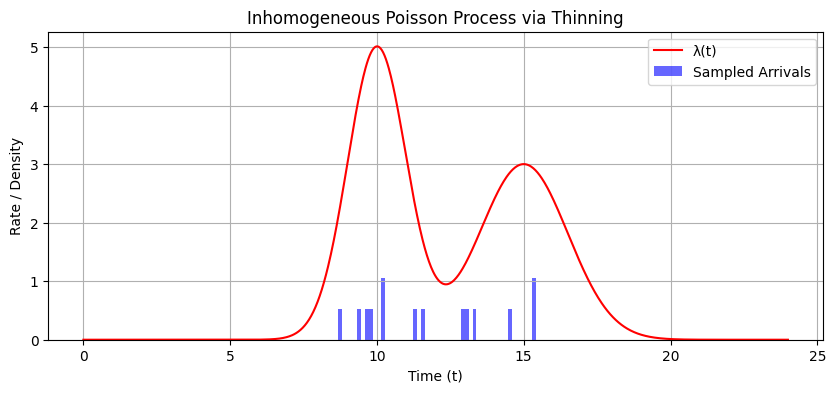

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define your inhomogeneous rate function λ(t)
def lambda_t(t):
    return 5 * np.exp(-0.5 * (t - 10)**2) + 3 * np.exp(-0.5 * ((t - 15)/1.5)**2)

# Thinning algorithm
def thinning_sampler(lambda_func, lambda_max, t_max):
    arrivals = []
    t = 0
    while t < t_max:
        # Step forward in time using exponential with lambda_max
        t += np.random.exponential(1 / lambda_max)
        if t >= t_max:
            break
        # Accept with probability λ(t) / λ_max
        u = np.random.uniform(0, 1)
        if u < lambda_func(t) / lambda_max:
            arrivals.append(t)
    return np.array(arrivals)

# Parameters
# lambda_max = 8  # must be >= max(lambda(t))
t_max = 24      # simulate over 24 hours
t_vals = np.linspace(0, 24, 1000)
lambda_vals = lambda_t(t_vals)
lambda_max = np.max(lambda_vals)


# Run the sampler
samples = thinning_sampler(lambda_func=lambda_t, lambda_max=lambda_max, t_max=t_max)

# Plot the result
t_vals = np.linspace(0, t_max, 1000)
plt.figure(figsize=(10, 4))
plt.plot(t_vals, lambda_t(t_vals), label="λ(t)", color='red')
plt.hist(samples, bins=50, density=True, alpha=0.6, label="Sampled Arrivals", color='blue')
plt.title("Inhomogeneous Poisson Process via Thinning")
plt.xlabel("Time (t)")
plt.ylabel("Rate / Density")
plt.legend()
plt.grid(True)
plt.show()


# Implementation with flexible n. Not constant but shifting the rate to sample more often with lower probability, so that we can see more samples.

C:\Users\sebas\AppData\Local\Temp\ipykernel_9520\1320975228.py:42: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(lambda_vals, t_vals)


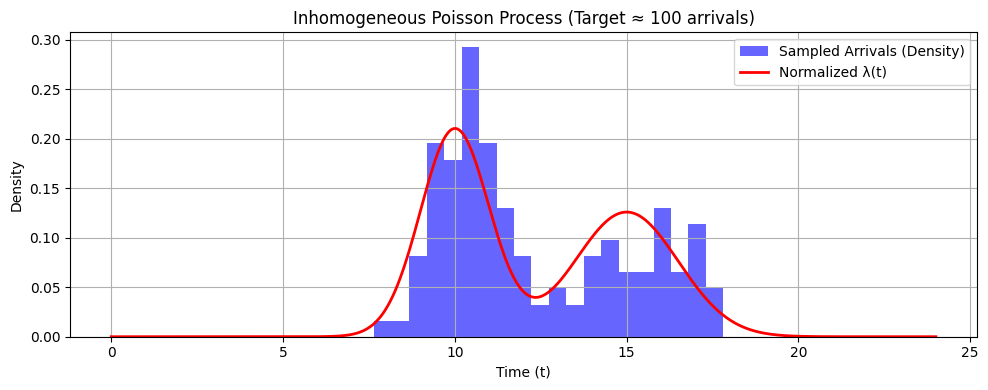

Actual number of arrivals: 121 (target was ~100)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.integrate import quad

# 1. Base shape of your inhomogeneous rate function λ_base(t)
def lambda_base(t):
    return 5 * np.exp(-0.5 * (t - 10)**2) + 3 * np.exp(-0.5 * ((t - 15)/1.5)**2)

# 2. Scaled lambda to target expected n arrivals
def make_lambda_scaled(n, t_max):
    integral, _ = quad(lambda_base, 0, t_max)
    scale = n / integral
    return lambda t: scale * lambda_base(t), scale

# 3. Thinning-based sampler for inhomogeneous Poisson process
def thinning_sampler(lambda_func, lambda_max, t_max):
    arrivals = []
    t = 0
    while t < t_max:
        t += np.random.exponential(1 / lambda_max)
        if t >= t_max:
            break
        if np.random.uniform(0, 1) < lambda_func(t) / lambda_max:
            arrivals.append(t)
    return np.array(arrivals)

# 4. Simulation parameters
t_max = 24
n_target = 100  # Approximate expected number of events
lambda_func, scale = make_lambda_scaled(n_target, t_max)
t_vals = np.linspace(0, t_max, 1000)
lambda_vals = lambda_func(t_vals)
lambda_max = np.max(lambda_vals)

# 5. Sample arrivals
samples = thinning_sampler(lambda_func, lambda_max, t_max)

# 6. Normalize λ(t) to match histogram density
# This works because histogram is in units of [count / (bin_width * total_count)]
# We divide λ(t) by total expected area under λ(t) to get comparable units
area = np.trapz(lambda_vals, t_vals)
lambda_density = lambda_vals / area

# 7. Plot λ(t) and histogram on the same scale
plt.figure(figsize=(10, 4))
plt.hist(samples, bins=20, density=True, alpha=0.6, label="Sampled Arrivals (Density)", color='blue')
plt.plot(t_vals, lambda_density, label="Normalized λ(t)", color='red', linewidth=2)
plt.title(f"Inhomogeneous Poisson Process (Target ≈ {n_target} arrivals)")
plt.xlabel("Time (t)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print actual number of samples for comparison
print(f"Actual number of arrivals: {len(samples)} (target was ~{n_target})")

